In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np
import glob
import os
import matplotlib.pyplot as plt


In [2]:
data_1 = pd.read_csv("RollingSystemDemand_1.csv",index_col=False,skiprows=1,skipfooter=1,engine='python',header=None)
data_1.columns=['VD','Date_Time','RollingSystemDemand']

In [3]:
data_1["Date_Time"]=pd.to_datetime(data_1["Date_Time"].astype(str),format='%Y%m%d%H%M%S')

In [4]:
data_1

,VD,Date_Time,RollingSystemDemand
0,VD,2021-09-20 00:00:00,21264
1,VD,2021-09-20 00:05:00,21281
2,VD,2021-09-20 00:10:00,21252
3,VD,2021-09-20 00:15:00,21303
4,VD,2021-09-20 00:20:00,21199
...,...,...,...
1995,VD,2021-09-26 22:15:00,22230
1996,VD,2021-09-26 22:20:00,21794
1997,VD,2021-09-26 22:25:00,21568
1998,VD,2021-09-26 22:30:00,21278


In [5]:
data_2 = pd.read_csv("RollingSystemDemand_2.csv",index_col=False,skiprows=1,skipfooter=1,engine='python',header=None)
data_2.columns=['VD','Date_Time','RollingSystemDemand']

In [6]:
data_2["Date_Time"]=pd.to_datetime(data_2["Date_Time"].astype(str),format='%Y%m%d%H%M%S')

In [7]:
data_1

,VD,Date_Time,RollingSystemDemand
0,VD,2021-09-20 00:00:00,21264
1,VD,2021-09-20 00:05:00,21281
2,VD,2021-09-20 00:10:00,21252
3,VD,2021-09-20 00:15:00,21303
4,VD,2021-09-20 00:20:00,21199
...,...,...,...
1995,VD,2021-09-26 22:15:00,22230
1996,VD,2021-09-26 22:20:00,21794
1997,VD,2021-09-26 22:25:00,21568
1998,VD,2021-09-26 22:30:00,21278


In [8]:
data_3 = pd.read_csv("RollingSystemDemand_3.csv",index_col=False,skiprows=1,skipfooter=1,engine='python',header=None)
data_3.columns=['VD','Date_Time','RollingSystemDemand']

In [9]:
data_3["Date_Time"]=pd.to_datetime(data_3["Date_Time"].astype(str),format='%Y%m%d%H%M%S')

In [10]:
data_3

,VD,Date_Time,RollingSystemDemand
0,VD,2021-10-04 00:00:00,21484
1,VD,2021-10-04 00:05:00,21570
2,VD,2021-10-04 00:10:00,21513
3,VD,2021-10-04 00:15:00,21465
4,VD,2021-10-04 00:20:00,21374
...,...,...,...
1995,VD,2021-10-10 22:15:00,23531
1996,VD,2021-10-10 22:20:00,23329
1997,VD,2021-10-10 22:25:00,23045
1998,VD,2021-10-10 22:30:00,22804


In [11]:
data = pd.concat([data_1,data_2,data_3])

In [12]:
data

,VD,Date_Time,RollingSystemDemand
0,VD,2021-09-20 00:00:00,21264
1,VD,2021-09-20 00:05:00,21281
2,VD,2021-09-20 00:10:00,21252
3,VD,2021-09-20 00:15:00,21303
4,VD,2021-09-20 00:20:00,21199
...,...,...,...
1995,VD,2021-10-10 22:15:00,23531
1996,VD,2021-10-10 22:20:00,23329
1997,VD,2021-10-10 22:25:00,23045
1998,VD,2021-10-10 22:30:00,22804


In [13]:
data.dtypes

VD                             object
Date_Time              datetime64[ns]
RollingSystemDemand             int64
dtype: object

In [14]:
data.isnull().sum()

VD                     0
Date_Time              0
RollingSystemDemand    0
dtype: int64

In [15]:
data.index=range(len(data))

In [16]:
def hour_fun(x):
    return x.hour
data['tm_hour'] = data['Date_Time'].apply(hour_fun)
data['tm_date'] = pd.DatetimeIndex(data['Date_Time']).day

In [17]:
data

,VD,Date_Time,RollingSystemDemand,tm_hour,tm_date
0,VD,2021-09-20 00:00:00,21264,0,20
1,VD,2021-09-20 00:05:00,21281,0,20
2,VD,2021-09-20 00:10:00,21252,0,20
3,VD,2021-09-20 00:15:00,21303,0,20
4,VD,2021-09-20 00:20:00,21199,0,20
...,...,...,...,...,...
5995,VD,2021-10-10 22:15:00,23531,22,10
5996,VD,2021-10-10 22:20:00,23329,22,10
5997,VD,2021-10-10 22:25:00,23045,22,10
5998,VD,2021-10-10 22:30:00,22804,22,10


In [18]:
data['tm_hour']

0        0
1        0
2        0
3        0
4        0
        ..
5995    22
5996    22
5997    22
5998    22
5999    22
Name: tm_hour, Length: 6000, dtype: int64

In [19]:
data['tm_date']

0       20
1       20
2       20
3       20
4       20
        ..
5995    10
5996    10
5997    10
5998    10
5999    10
Name: tm_date, Length: 6000, dtype: int64

In [20]:
convert_dict = {'RollingSystemDemand':float}
data = data.astype(convert_dict)                              

In [21]:
data.dtypes

VD                             object
Date_Time              datetime64[ns]
RollingSystemDemand           float64
tm_hour                         int64
tm_date                         int64
dtype: object

Text(0.5, 1.0, 'Mean value across all days per every hour')

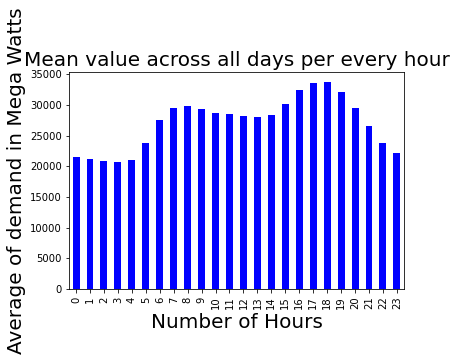

In [22]:
data['RollingSystemDemand'].groupby(data['tm_hour']).mean().plot(kind='bar', color='blue')
plt.xlabel('Number of Hours', fontsize=20)
plt.ylabel('Average of demand in Mega Watts', fontsize=20)
plt.title('Mean value across all days per every hour', fontsize=20)

In [23]:
data['RollingSystemDemand'].groupby([data['tm_date'],data['tm_hour']]).mean()

tm_date  tm_hour
1        0          20777.666667
         1          20768.250000
         2          20555.250000
         3          20717.000000
         4          20999.666667
                        ...     
30       19         32323.333333
         20         29784.083333
         21         26419.666667
         22         23059.083333
         23         21204.250000
Name: RollingSystemDemand, Length: 501, dtype: float64

Text(0.5, 1.0, 'Mean value across all days per every hour')

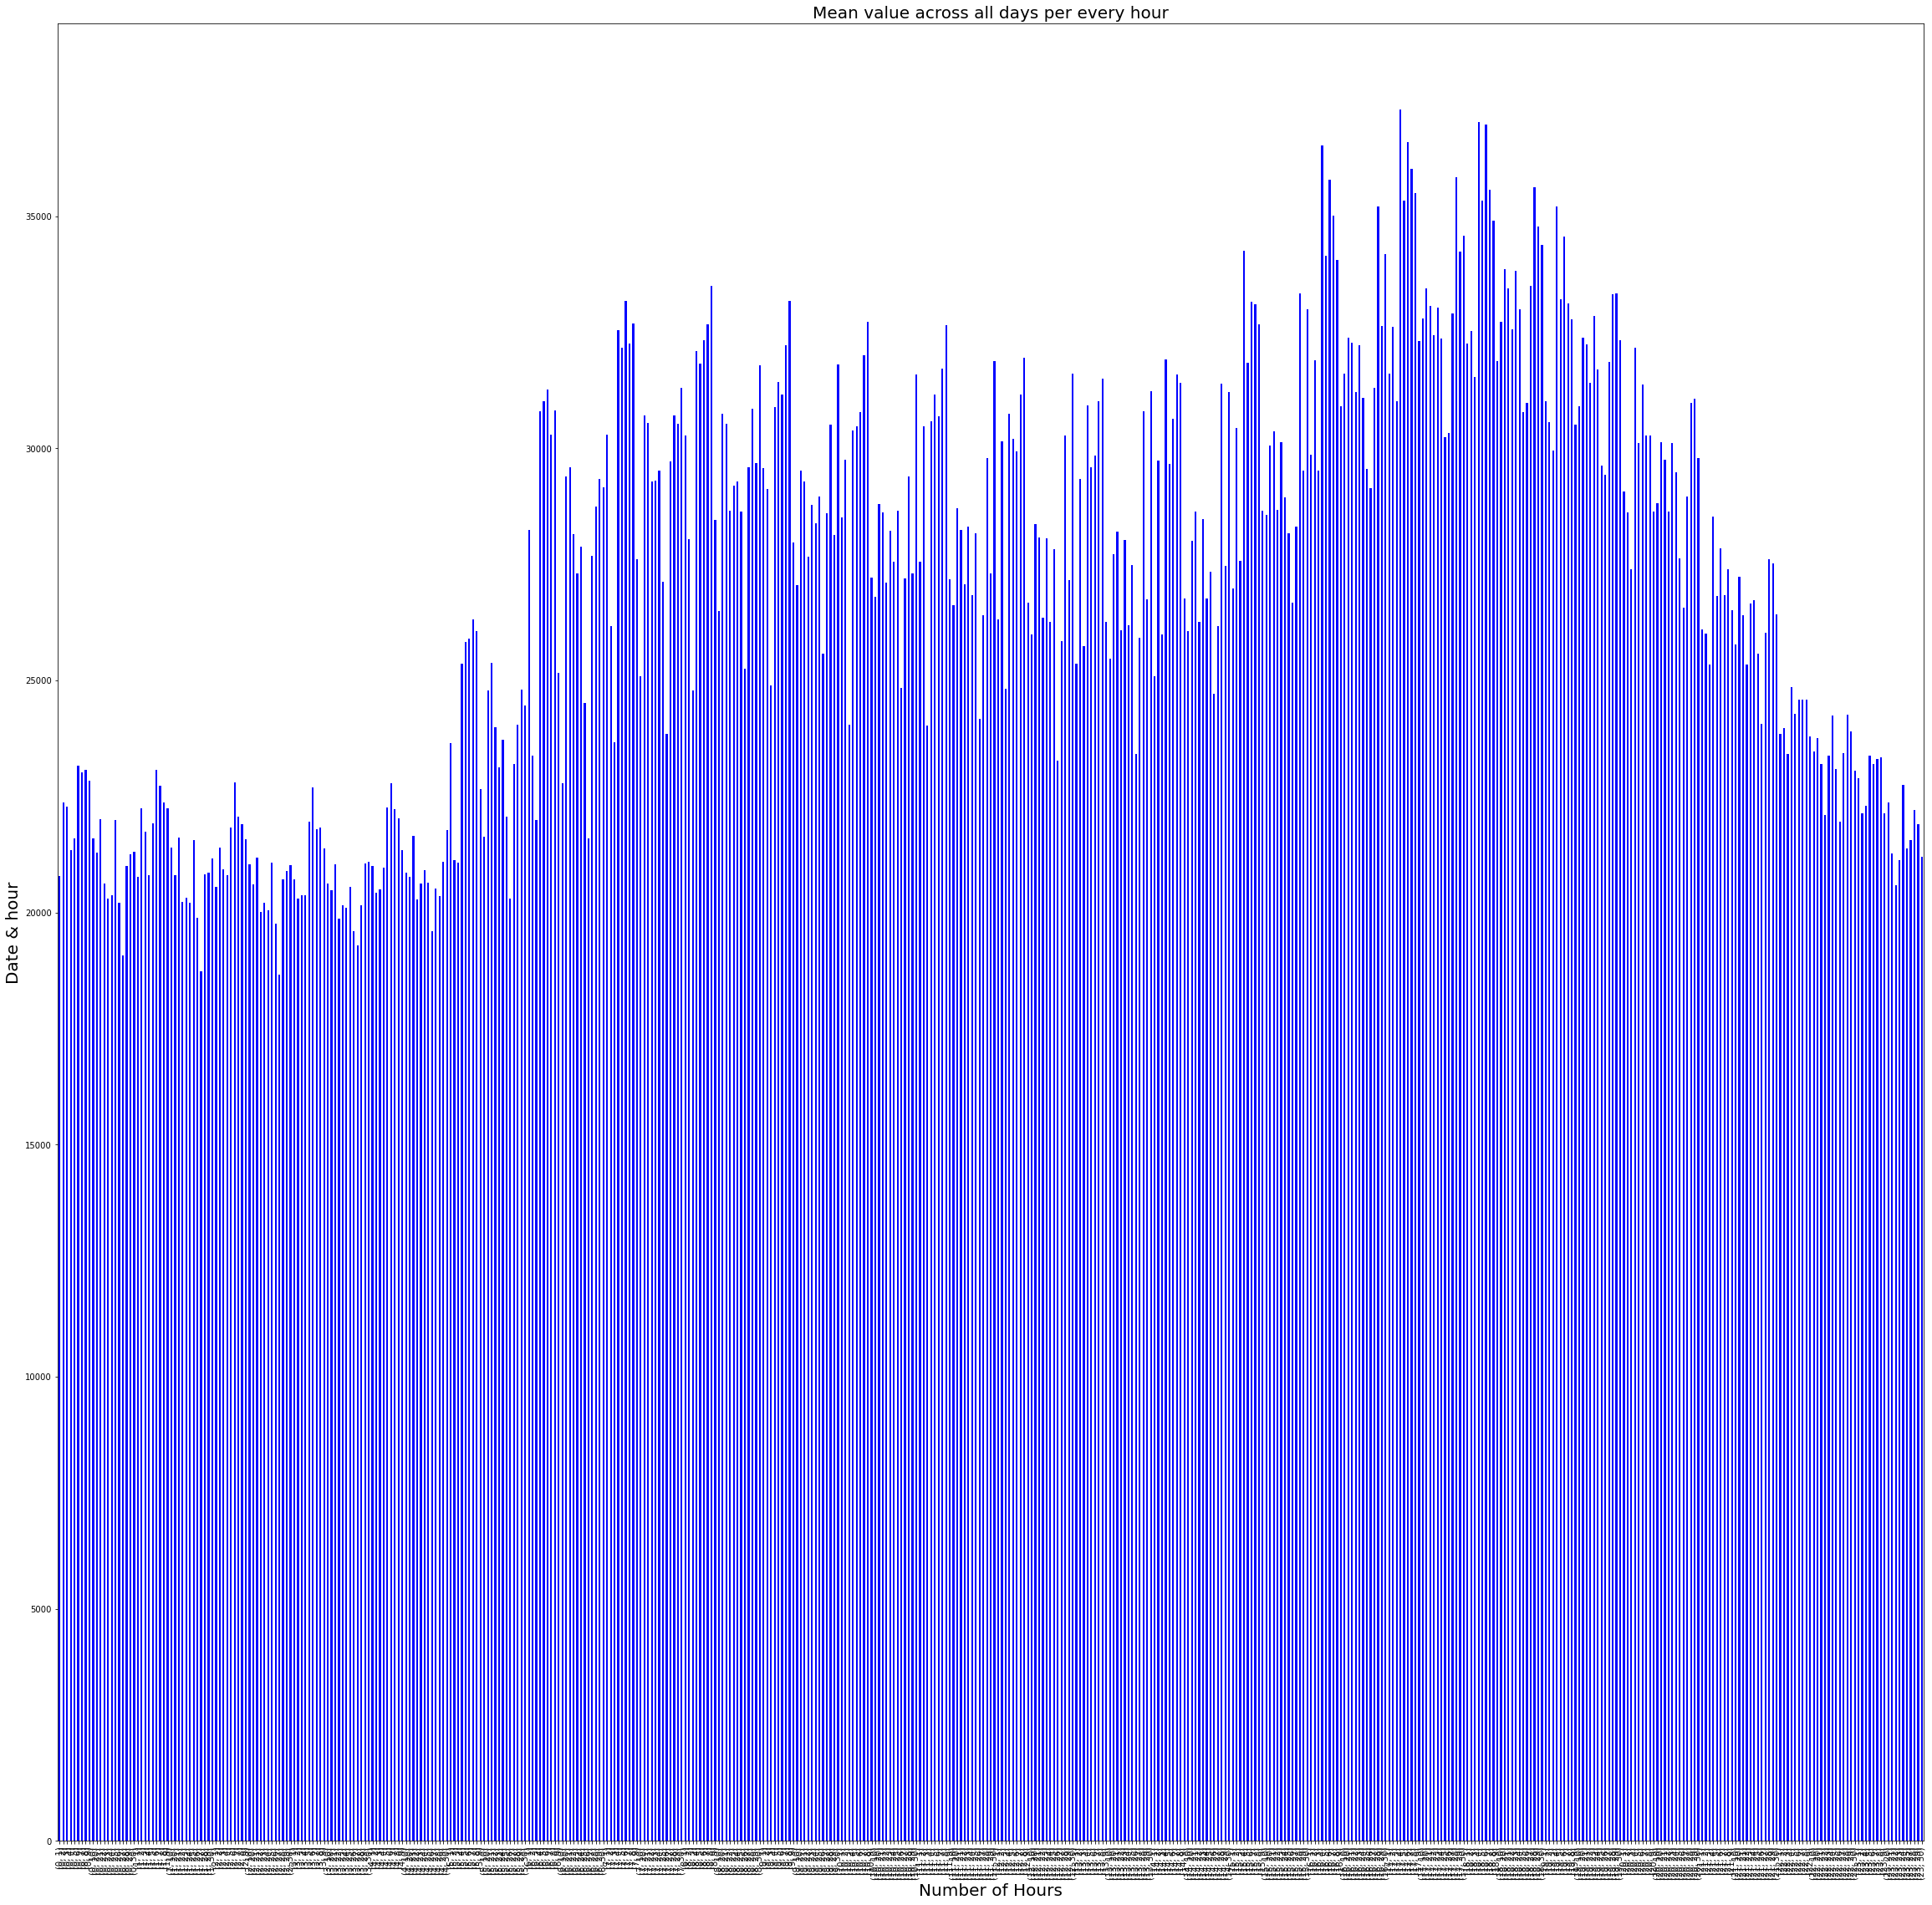

In [25]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 40
fig_size[1] = 40
data['RollingSystemDemand'].groupby([data['tm_hour'],data['tm_date']]).mean().plot(kind='bar', color='blue')
plt.xlabel('Number of Hours', fontsize=20)
plt.ylabel('Date & hour', fontsize=20)
plt.title('Mean value across all days per every hour', fontsize=20)